In [1]:
import os
from glob import glob 
import matplotlib.pyplot as plt 
import numpy as np 
import geopandas as gpd 
import xarray as xr 
import rioxarray as rxr
import earthpy as et 
import earthpy.spatial as es 
import earthpy.plot as ep

In [2]:
os.chdir(os.path.join(et.io.HOME, "earth-analytics", "data"))

In [3]:
landsat_post_fire_path = os.path.join("cold-springs-fire", "landsat_collect", "LC080340322016072301T1-SC20180214145802", "crop")


In [4]:
landsat_post_fire_path

'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop'

In [5]:
os.listdir(landsat_post_fire_path)

['LC08_L1TP_034032_20160723_20180131_01_T1_pixel_qa_crop.tif',
 'LC08_L1TP_034032_20160723_20180131_01_T1_sr_aerosol_crop.tif',
 'LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif',
 'LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif',
 'LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif',
 'LC08_L1TP_034032_20160723_20180131_01_T1_sr_band6_crop.tif',
 'LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'LC08_L1TP_034032_20160723_20180131_01_T1_radsat_qa_crop.tif',
 'LC08_L1TP_034032_20160723_20180131_01_T1_sr_band7_crop.tif',
 'LC08_L1TP_034032_20160723_20180131_01_T1_sr_band1_crop.tif']

In [6]:
post_fire_paths = glob(os.path.join(landsat_post_fire_path, "*band*.tif"))

post_fire_paths

['cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band6_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band7_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band1_crop.tif']

In [7]:
post_fire_paths.sort()
post_fire_paths

['cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band1_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band6_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band7_crop.tif']

In [8]:
band_1 = rxr.open_rasterio(post_fire_paths[0], masked=True).squeeze()
band_1.shape

(177, 246)

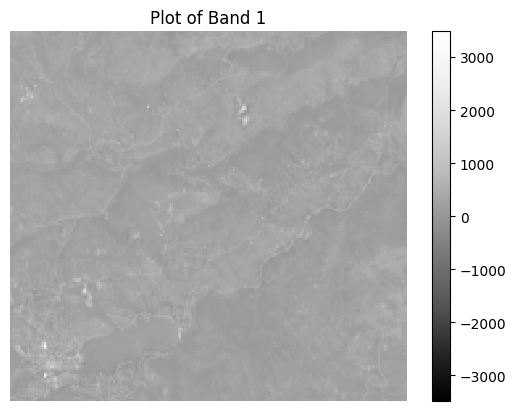

In [9]:
f, ax = plt.subplots()
band_1.plot.imshow(ax=ax, cmap="Greys_r")
ax.set_axis_off()
ax.set_title("Plot of Band 1")
plt.show()

In [10]:
def open_clean_bands(band_path):
    return rxr.open_rasterio(band_path, masked=True).squeeze()

In [11]:
all_bands = []

for i, aband in enumerate(post_fire_paths):
    all_bands.append(open_clean_bands(aband))
    all_bands[i]["band"] = i+1

In [12]:
all_bands

[<xarray.DataArray (y: 177, x: 246)> Size: 174kB
 [43542 values with dtype=float32]
 Coordinates:
     band         int64 8B 1
   * x            (x) float64 2kB 4.557e+05 4.557e+05 ... 4.63e+05 4.63e+05
   * y            (y) float64 1kB 4.428e+06 4.428e+06 ... 4.423e+06 4.423e+06
     spatial_ref  int64 8B 0
 Attributes:
     AREA_OR_POINT:       Area
     STATISTICS_MAXIMUM:  3483
     STATISTICS_MEAN:     297.16466859584
     STATISTICS_MINIMUM:  -57
     STATISTICS_STDDEV:   119.61507774931
     scale_factor:        1.0
     add_offset:          0.0,
 <xarray.DataArray (y: 177, x: 246)> Size: 174kB
 [43542 values with dtype=float32]
 Coordinates:
     band         int64 8B 2
   * x            (x) float64 2kB 4.557e+05 4.557e+05 ... 4.63e+05 4.63e+05
   * y            (y) float64 1kB 4.428e+06 4.428e+06 ... 4.423e+06 4.423e+06
     spatial_ref  int64 8B 0
 Attributes:
     AREA_OR_POINT:       Area
     STATISTICS_MAXIMUM:  3743
     STATISTICS_MEAN:     337.61331587892
     STATISTI

In [13]:
landsat_post_fire_xr = xr.concat(all_bands, dim="band")
landsat_post_fire_xr

<xarray.DataArray (band: 7, y: 177, x: 246)> Size: 1MB
array([[[ 446.,  476.,  487., ...,  162.,  220.,  260.],
        [ 393.,  457.,  488., ...,  200.,  235.,  296.],
        [ 364.,  393.,  388., ...,  246.,  298.,  347.],
        ...,
        [ 249.,  283.,  363., ...,  272.,  268.,  284.],
        [ 541.,  474.,  364., ...,  260.,  269.,  285.],
        [ 219.,  177.,  250., ...,  271.,  271.,  286.]],

       [[ 515.,  547.,  572., ...,  181.,  233.,  261.],
        [ 440.,  519.,  571., ...,  211.,  251.,  322.],
        [ 411.,  460.,  449., ...,  264.,  326.,  387.],
        ...,
        [ 387.,  326.,  427., ...,  288.,  278.,  301.],
        [ 554.,  654.,  433., ...,  276.,  276.,  293.],
        [ 291.,  174.,  291., ...,  292.,  290.,  304.]],

       [[ 782.,  772.,  843., ...,  335.,  390.,  411.],
        [ 684.,  771.,  836., ...,  363.,  412.,  511.],
        [ 656.,  725.,  706., ...,  425.,  518.,  599.],
        ...,
...
        ...,
        [1900., 1917., 2076., ..., 1722., 1891., 1890.],
        [1779., 1893., 1983., ..., 1645., 1847., 2090.],
        [1553., 1440., 1587., ..., 1562., 1689., 1964.]],

       [[2864., 2974., 3108., ...,  983., 1195., 1271.],
        [2527., 2827., 3008., ..., 1132., 1293., 1546.],
        [2141., 2427., 2433., ..., 1324., 1652., 1922.],
        ...,
        [1662., 1757., 1922., ..., 1463., 1472., 1519.],
        [1786., 1532., 1554., ..., 1374., 1423., 1450.],
        [1071.,  943.,  975., ..., 1524., 1461., 1518.]],

       [[1920., 1979., 2098., ...,  537.,  660.,  687.],
        [1505., 1863., 1975., ...,  651.,  747.,  924.],
        [1240., 1407., 1391., ...,  769., 1018., 1189.],
        ...,
        [1216., 1190., 1398., ...,  877.,  890.,  928.],
        [1517., 1184., 1078., ...,  846.,  810.,  820.],
        [ 660.,  593.,  623., ...,  984.,  909.,  880.]]], dtype=float32)
Coordinates:
  * band         (band) int64 56B 1 2 3 4 5 6 7
  * x            (x) float64 2kB 4.557e+05 4.557e+05 ... 4.63e+05 4.63e+05
  * y            (y) float64 1kB 4.428e+06 4.428e+06 ... 4.423e+06 4.423e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  3483
    STATISTICS_MEAN:     297.16466859584
    STATISTICS_MINIMUM:  -57
    STATISTICS_STDDEV:   119.61507774931
    scale_factor:        1.0
    add_offset:          0.0

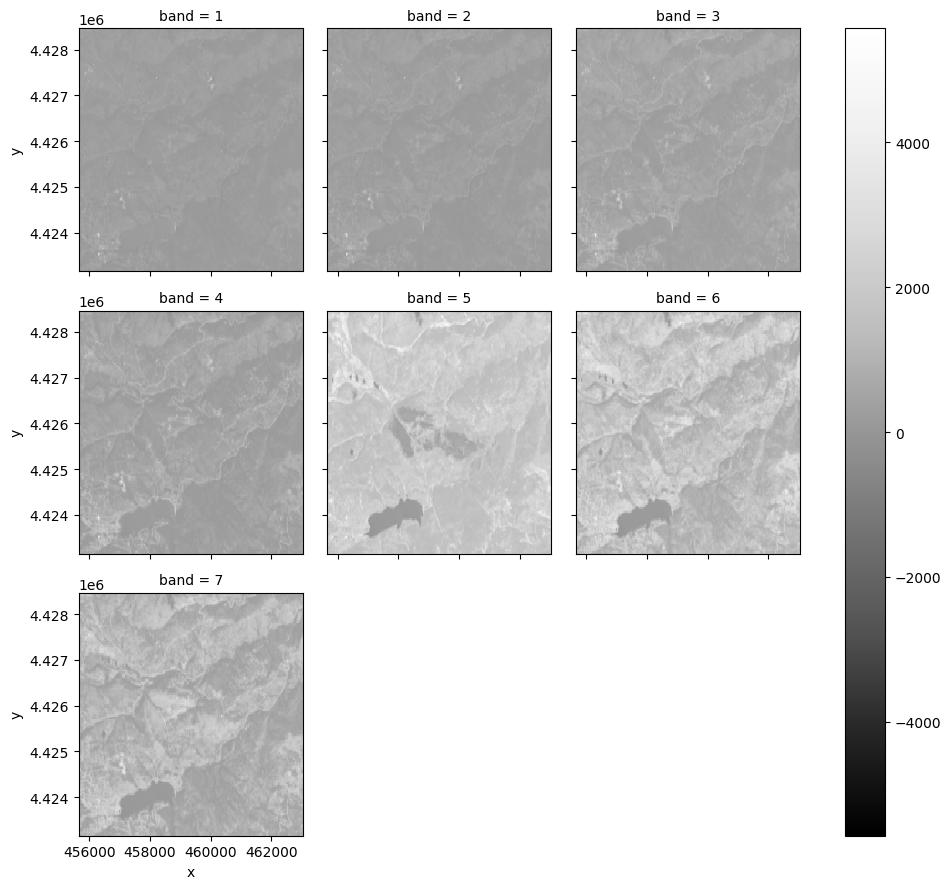

In [14]:
landsat_post_fire_xr.plot.imshow(col="band", col_wrap=3, cmap="Greys_r")
plt.show()

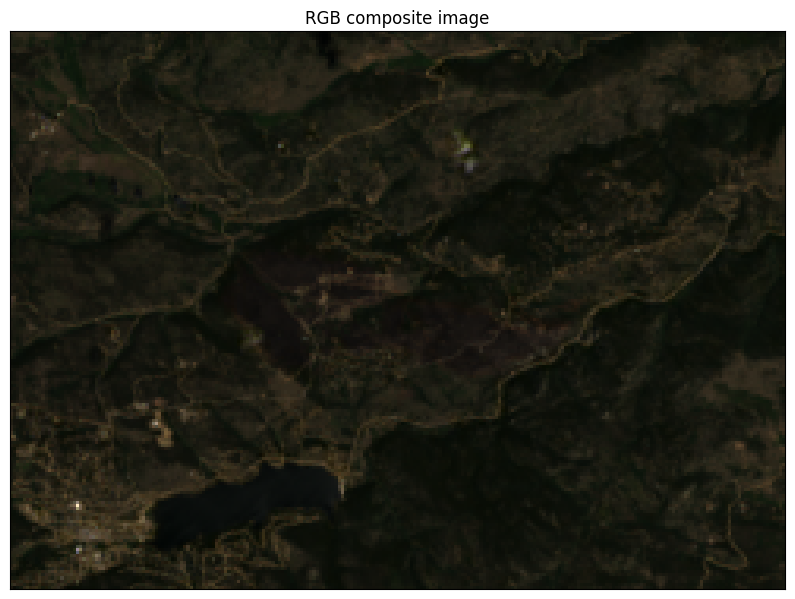

In [15]:
ep.plot_rgb(landsat_post_fire_xr.values, rgb=[3,2,1], title="RGB composite image")
plt.show()

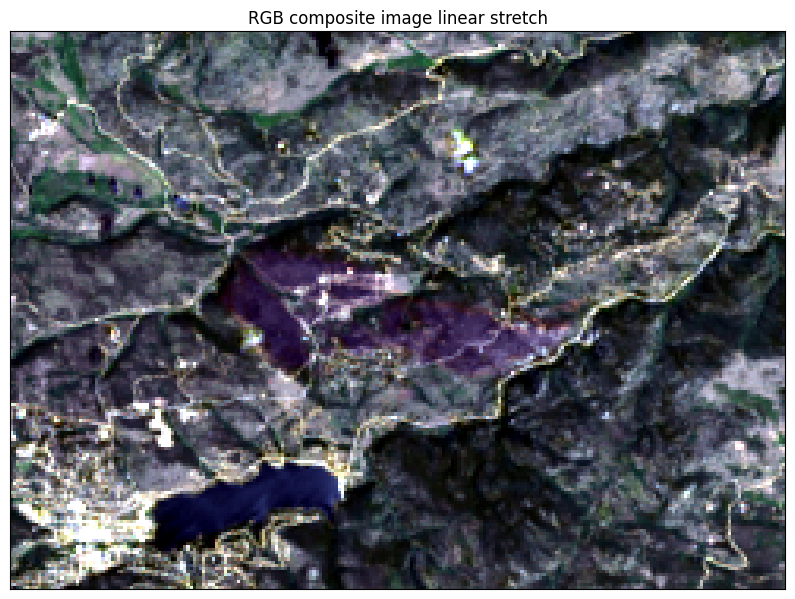

In [16]:
ep.plot_rgb(landsat_post_fire_xr.values, rgb=[3,2,1], title="RGB composite image linear stretch", stretch=True, str_clip=1)
plt.show()

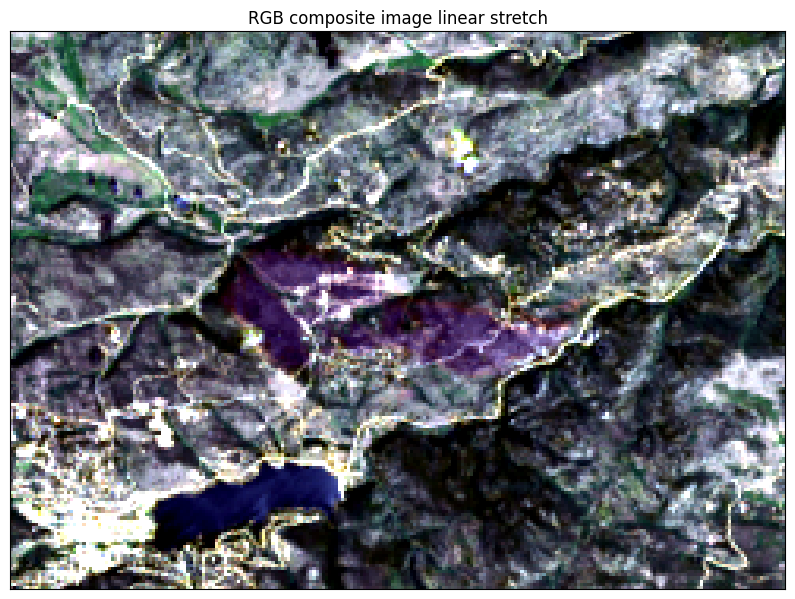

In [17]:
ep.plot_rgb(landsat_post_fire_xr.values, rgb=[3,2,1], title="RGB composite image linear stretch", stretch=True, str_clip=4)
plt.show()

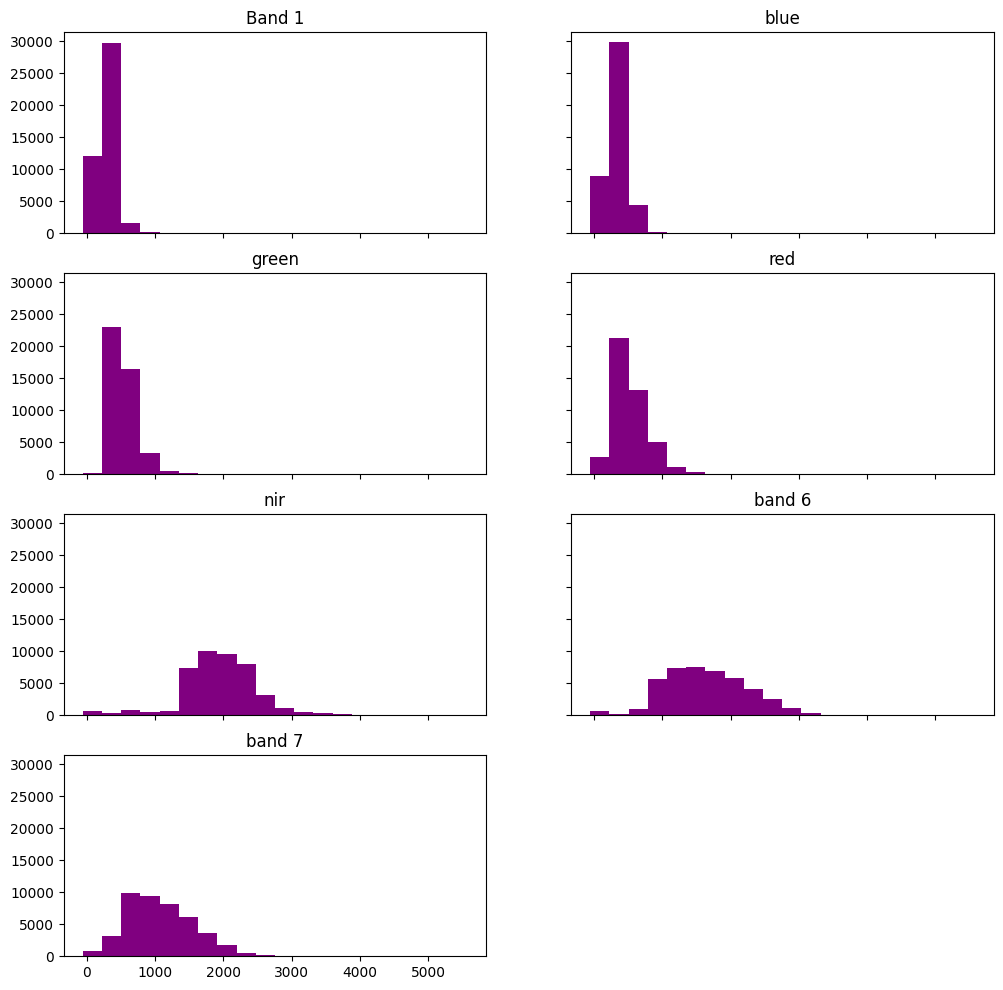

In [18]:
band_titles = ["Band 1", "blue", "green", "red", "nir", "band 6", "band 7"]

ep.hist(landsat_post_fire_xr.values, title=band_titles)

plt.show()

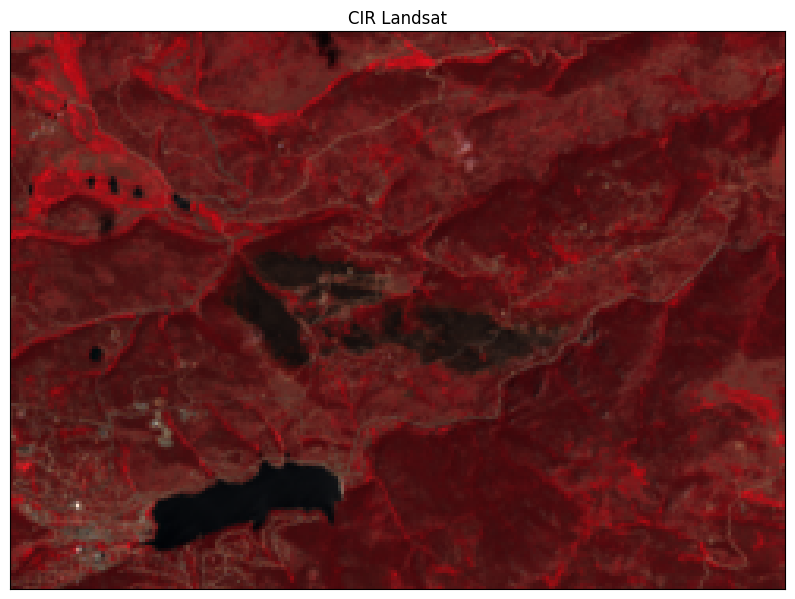

In [19]:
ep.plot_rgb(landsat_post_fire_xr.values, rgb=[4,3,2], title="CIR Landsat")
plt.show()